In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from itertools import chain
from collections import Counter
import string
import random
from itertools import islice
import json


import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from transformers import pipeline
import pickle

### Define Functions

In [62]:
class keyword_analysis:
    
    def __init__(self, data):
        self.data = data
        
    def passages(self, channel):
        temp_df = self.data[self.data['contributor'] == channel]
        flattened_passages = list(chain.from_iterable(temp_df['Passages']))
    
        return flattened_passages
    
    def passages_show(self, show):
        temp_df = self.data[self.data['Source'] == show]
        flattened_passages = list(chain.from_iterable(temp_df['Passages']))
    
        return flattened_passages
        
    def generate_freq(self, corpus):
        translator = str.maketrans("","" , string.punctuation)
        corpus_processed = corpus.translate(translator)
        
        unigrams_temp = [word.lower() for word in nltk.word_tokenize(corpus_processed)]
        
        bigrams = list(ngrams(unigrams_temp, 2))
        bigram_freq = dict(Counter(bigrams))
        
        stop_words = set(stopwords.words('english'))
        unigrams = [word for word in unigrams_temp if word not in stop_words]
        unigram_freq = dict(Counter(unigrams))
        
        sorted_unigrams = dict(sorted(unigram_freq.items(), key=lambda item: item[1],reverse=True))
        sorted_bigrams = dict(sorted(bigram_freq.items(), key=lambda item: item[1], reverse=True))
        
        return sorted_unigrams, sorted_bigrams
    
    def run_analysis(self, channel, anti_words):
    
        channel_passages = self.passages(channel)
        corpus = ' '.join(channel_passages)

        frequencies = self.generate_freq(corpus)
        unigrams = frequencies[0]
        bigrams = frequencies[1]

        neg_word = {word: unigrams.get(word, 0) for word in anti_words.keys()}

        return unigrams, bigrams, neg_word
    
    def run_analysis_shows(self, show, anti_words):
    
        channel_passages = self.passages_show(show)
        corpus = ' '.join(channel_passages)

        frequencies = self.generate_freq(corpus)
        unigrams = frequencies[0]
        bigrams = frequencies[1]

        neg_word = {word: unigrams.get(word, 0) for word in anti_words.keys()}

        return unigrams, bigrams, neg_word

    def plot_analysis(self, contributor, neg_word):
        plt.figure(figsize=(12, 8))
        plt.bar(neg_word.keys(), neg_word.values())
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title('Top 10 Antipathy Words')
        plt.xticks(rotation='vertical')
        plt.show()
        
        filename = 'TV/' + str(contributor) + '_antiwords.png'
        plt.savefig(filename)

### Top antipathy words

In [3]:
tv_data = pd.read_pickle('TV/tv_data_processed.pkl')
tv_data

,addeddate,contributor,description,program,tuner,text,Passages
0,2022-02-02 08:00:00,MSNBCW,"""Chris Hayes reports on some of the biggest ne...",All In With Chris Hayes,Virtual Ch. 787,"tonight on all in. >> they know it\'s true, th...","[tonight on all in. >> they know it\'s true, t..."
1,2022-01-02 00:30:00,RT,"""Markets! Finance! Scandal! Keiser Report i...",Keiser Report,Channel IPTV,"""ah ah whoa, happy new year special kaiser rep...","[""ah ah whoa, happy new year special kaiser re..."
2,2022-01-06 13:30:00,RT,Former First Minister of Scotland Alex Salmond...,The Alex Salmond Show,Channel IPTV,"""ah, for june . welcome to the alexander. so i...","[""ah, for june . welcome to the alexander. so ..."
3,2022-01-14 05:00:00,RT,"RT news, interviews and shows available as pod...",News,Channel IPTV,"""ah ah, his royal highness, no more. queen eli...","[""ah ah, his royal highness, no more. queen el..."
4,2022-01-16 17:00:00,RT,"RT news, interviews and shows available as pod...",News,Channel IPTV,"""ah, with tennis superstar new york of h is de...","[""ah, with tennis superstar new york of h is d..."
...,...,...,...,...,...,...,...
43279,2022-05-13 03:00:00,FOXNEWSW,Greg Gutfeld examines the news of the day thro...,Gutfeld!,Virtual Ch. 760,who bought them. >> they sent them an email. >...,[who bought them. >> they sent them an email. ...
43280,2022-10-27 00:30:00,RT,"""RT's documentaries give a varied and unique v...",Documentary,Channel IPTV,"""have any quality for russians, all we gotta d...","[""have any quality for russians, all we gotta ..."
43281,2022-10-26 17:30:00,RT,"""RT's documentaries give a varied and unique v...",Documentary,Channel IPTV,"""ah ah a ah with. ringback ringback ah, becaus...","[""ah ah a ah with. ringback ringback ah, becau..."
43282,2022-10-19 05:00:00,FOXNEWSW,Powerful analysis and spirited debates with gu...,Tucker Carlson Tonight,Virtual Ch. 760,""">> they willw em. they fought for us .sn no't...","["">> they willw em. they fought for us .sn no'..."


In [4]:
contributors =  list(tv_data['contributor'].unique())
contributors

['MSNBCW', 'RT', 'BBCNEWS', 'CNNW', 'FOXNEWSW']

In [63]:
analysis_class = keyword_analysis(tv_data)

In [64]:
antipathy_words = {'hate': 0, 'resent':0, 'dislike':0, 'despise':0, 'detest':0, 'loathe':0,
                   'abhor':0, 'deride':0, 'disparage':0, 'hostile':0}

In [ ]:
for contributor in contributors:
    unigrams, bigrams, neg_words = analysis_class.run_analysis(contributor, antipathy_words)
    analysis_class.plot_analysis(contributor, neg_words)
    all_dicts = {'unigrams': unigrams, 'bigrams': bigrams, 'neg_words': neg_words}
    file_path = 'TV/' + str(contributor) + '_uni_bi_neg.pkl'
    
    with open(file_path, "wb") as file:
        pickle.dump(all_dicts, file)

In [2]:
data_MS = pd.read_pickle('TV/MSNBCW_uni_bi_neg.pkl')
data_FX = pd.read_pickle('TV/FOXNEWSW_uni_bi_neg.pkl')
data_CNN = pd.read_pickle('TV/CNNW_uni_bi_neg.pkl')
data_RT = pd.read_pickle('TV/RT_uni_bi_neg.pkl')
data_BBC = pd.read_pickle('TV/BBCNEWS_uni_bi_neg.pkl')

In [24]:
antipathy_df = pd.DataFrame(columns=['Words', 'MSNBCW', 'FOXNEWSW', 'CNNW', 'RT', 'BBCNEWS'])
antipathy_df['Words'] = antipathy_words
antipathy_df['MSNBCW'] = data_MS['neg_words'].values()
antipathy_df['FOXNEWSW'] = data_FX['neg_words'].values()
antipathy_df['CNNW'] = data_CNN['neg_words'].values()
antipathy_df['RT'] = data_RT['neg_words'].values()
antipathy_df['BBCNEWS'] = data_BBC['neg_words'].values()

In [25]:
antipathy_df = antipathy_df.drop( columns=['Words'])
antipathy_df

,MSNBCW,FOXNEWSW,CNNW,RT,BBCNEWS
hate,3747,4703,3320,2509,2543
resent,28,59,38,111,136
dislike,116,167,44,240,138
despise,34,109,19,94,39
detest,5,14,3,32,47
loathe,48,28,23,0,64
abhor,8,6,2,4,2
deride,5,7,5,0,4
disparage,40,37,23,11,14
hostile,485,592,324,1901,691


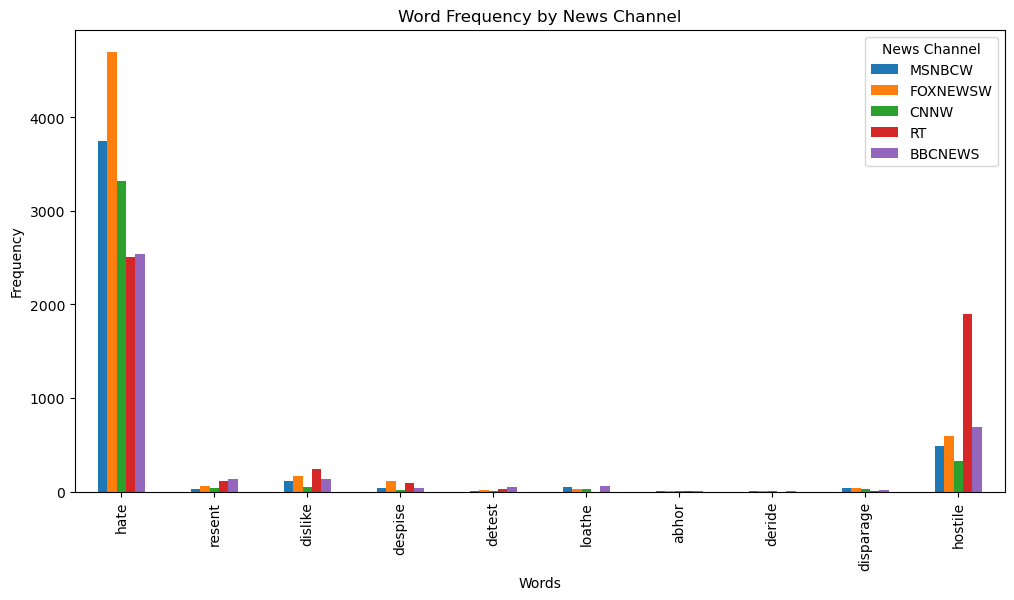

In [31]:
# Create the bar plot
ax = antipathy_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency by News Channel')
plt.legend(title='News Channel', loc='upper right')

# Display the plot
plt.show()

In [34]:
hate_analysis = antipathy_df.T['hate']

<BarContainer object of 5 artists>

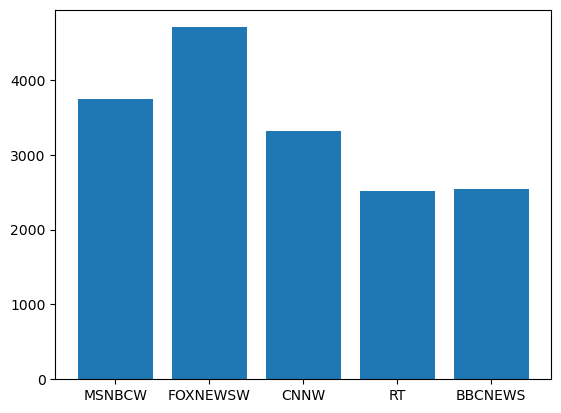

In [35]:
plt.bar(hate_analysis.index, hate_analysis.values)

### Show-wise Analysis

In [56]:
shows = list(tv_data['program'].unique())
len(shows)

513

In [61]:
tv_data['Source'] = tv_data['contributor'] + '-' + tv_data['program'] + '-' + tv_data['tuner']
tv_data["NumPassages"] = tv_data["Passages"].apply(lambda x: len(x))
result = tv_data.groupby("Source")["NumPassages"].sum().reset_index().sort_values(by='NumPassages', ascending= False)
final_shows = list(result['Source'][:100])

In [67]:
all_neg_words = {}
for show in final_shows:
    uni, bi, neg_words = analysis_class.run_analysis_shows(show, antipathy_words)
    all_neg_words[show] = neg_words

In [86]:
antipathy_df_all = pd.DataFrame(columns=final_shows)
antipathy_df_all['Words'] = antipathy_words
for show in final_shows:
    antipathy_df_all[show] = all_neg_words[show].values()

In [87]:
antipathy_df_all = antipathy_df_all.drop(columns=['Words'])
top_antipathy_df = antipathy_df_all.sort_values(by='hate', axis=1, ascending=False).T[:10]
top_antipathy_df

,hate,resent,dislike,despise,detest,loathe,abhor,deride,disparage,hostile
RT-News-Channel IPTV,1047,65,98,58,1,0,4,0,0,935
BBCNEWS-BBC News-Channel 11495 MHz,986,47,40,18,24,18,2,1,0,272
RT-Documentary-Channel IPTV,947,28,99,26,31,0,0,0,1,690
FOXNEWSW-Tucker Carlson Tonight-Virtual Ch. 760,540,2,25,25,2,6,0,0,1,80
FOXNEWSW-Gutfeld!-Virtual Ch. 760,491,7,5,2,0,0,0,0,3,18
MSNBCW-Morning Joe-Virtual Ch. 787,480,7,13,5,4,6,2,2,1,50
CNNW-Don Lemon Tonight-Virtual Ch. 759,420,9,4,0,0,5,0,0,2,37
FOXNEWSW-Hannity-Virtual Ch. 760,411,4,17,10,4,2,0,1,2,118
FOXNEWSW-The Ingraham Angle-Virtual Ch. 760,410,2,8,26,2,11,1,1,2,43
BBCNEWS-Breakfast-Channel 11495 MHz,384,18,25,3,16,9,0,1,6,74


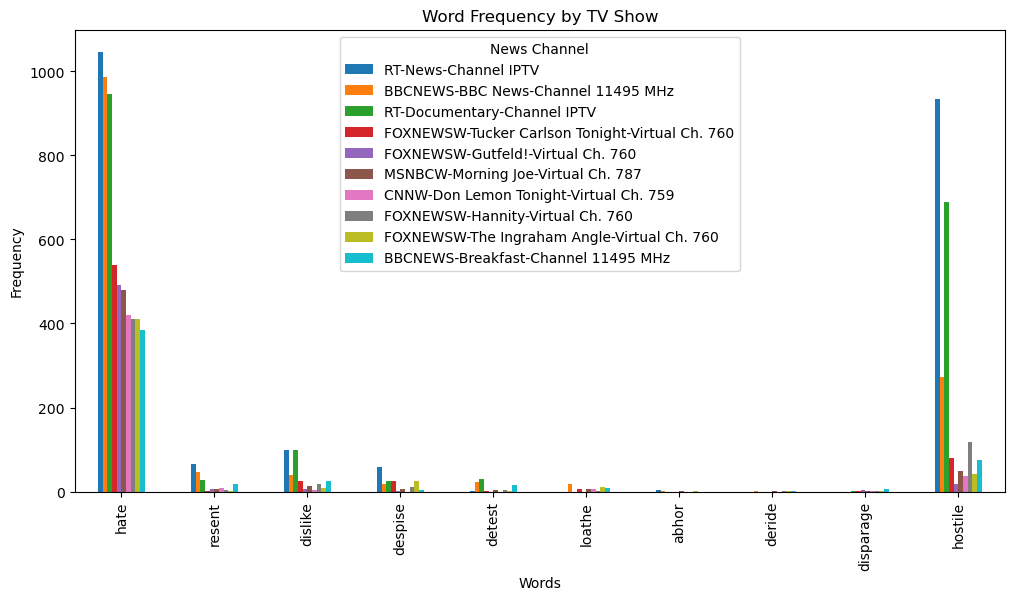

In [89]:
# Create the bar plot
ax = top_antipathy_df.T.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency by TV Show')
plt.legend(title='News Channel', loc='best')

# Display the plot
plt.show()

In [90]:
antipathy_df_all.to_pickle('TV/tvshows-antipathy-analysis.pkl')

### Context words analysis

In [44]:
def context_word_frequencies(bigrams, target_word):
    before_words = {}
    after_words = {}

    for bigram, frequency in bigrams.items():
        if bigram[0] == target_word:
            after_words[bigram[1]] = after_words.get(bigram[1], 0) + frequency
        elif bigram[1] == target_word:
            before_words[bigram[0]] = before_words.get(bigram[0], 0) + frequency

    sorted_before_words = dict(sorted(before_words.items(), key=lambda item: item[1], reverse=True))
    sorted_after_words = dict(sorted(after_words.items(), key=lambda item: item[1], reverse=True))
    
    size = 20
    if len(sorted_before_words.items()) < 20 or len(sorted_after_words.items()) <20:
        size = min(len(sorted_before_words.items()), len(sorted_after_words.items()))
    
    top_before_words = dict(islice(sorted_before_words.items(), size))
    top_after_words = dict(islice(sorted_after_words.items(), size))
    
    return top_before_words, top_after_words, size

In [45]:
def create_context_word_dataframe(bigrams, target_word):
    before_words, after_words, size = context_word_frequencies(bigrams, target_word)
    context_words = pd.DataFrame(columns=['Before_Words', 'B_Count', 'Target_Word', 
                                          'After_Words', 'A_Count'])
    context_words['Before_Words'] = before_words.keys()
    context_words['B_Count'] = before_words.values()
    context_words['After_Words'] = after_words.keys()
    context_words['A_Count'] = after_words.values()
    context_words['Target_Word'] = [target_word for i in range(size)]
    
    return context_words

In [46]:
target_word = 'hate'

In [47]:
context_words_df_MS = create_context_word_dataframe(data_MS['bigrams'], target_word)
context_words_df_MS

,Before_Words,B_Count,Target_Word,After_Words,A_Count
0,i,582,hate,to,422
1,of,344,hate,crimes,401
2,a,211,hate,crime,389
3,the,178,hate,and,255
4,to,160,hate,speech,156
5,federal,149,hate,that,107
6,and,129,hate,the,106
7,they,125,hate,it,70
8,that,68,hate,in,62
9,you,60,hate,him,58


In [48]:
context_words_df_FX = create_context_word_dataframe(data_FX['bigrams'], target_word)
context_words_df_FX

,Before_Words,B_Count,Target_Word,After_Words,A_Count
0,i,976,hate,to,636
1,they,470,hate,crime,401
2,a,225,hate,the,263
3,to,225,hate,speech,227
4,of,195,hate,and,198
5,you,190,hate,that,147
6,and,122,hate,crimes,142
7,that,116,hate,it,124
8,the,114,hate,you,96
9,we,75,hate,him,87


In [49]:
context_words_df_CN = create_context_word_dataframe(data_CNN['bigrams'], target_word)
context_words_df_CN

,Before_Words,B_Count,Target_Word,After_Words,A_Count
0,i,496,hate,crimes,410
1,of,287,hate,crime,374
2,federal,235,hate,to,340
3,the,169,hate,and,164
4,a,161,hate,speech,142
5,to,152,hate,that,122
6,and,105,hate,the,100
7,you,85,hate,you,82
8,they,82,hate,managing,75
9,but,80,hate,it,68


In [50]:
context_words_df_RT = create_context_word_dataframe(data_RT['bigrams'], target_word)
context_words_df_RT

,Before_Words,B_Count,Target_Word,After_Words,A_Count
0,i,413,hate,speech,293
1,to,183,hate,the,232
2,of,149,hate,to,154
3,and,129,hate,and,129
4,or,113,hate,i,107
5,the,102,hate,that,73
6,a,90,hate,crimes,68
7,they,67,hate,this,57
8,after,62,hate,crime,55
9,you,49,hate,is,55


In [51]:
context_words_df_BBC = create_context_word_dataframe(data_BBC['bigrams'], target_word)
context_words_df_BBC

,Before_Words,B_Count,Target_Word,After_Words,A_Count
0,i,533,hate,to,297
1,a,190,hate,crime,235
2,of,162,hate,crimes,194
3,and,80,hate,speech,172
4,to,73,hate,the,106
5,really,67,hate,it,101
6,they,67,hate,and,83
7,or,62,hate,them,74
8,you,54,hate,that,70
9,the,52,hate,me,46


### Subject, Object, Causes Analysis

In [ ]:
import spacy
from collections import defaultdict

nlp = spacy.load("en_core_web_sm")

def extract_contexts(text):
    doc = nlp(text)
    contexts = defaultdict(list)

    for sent in doc.sents:
        for token in sent:
            if token.text.lower() == "they" and token.head.text.lower() == "hate":
                subject = [child.text for child in token.head.children if "nsubj" in child.dep_]
                object_ = [child.text for child in token.head.children if "obj" in child.dep_]
                cause = [child.text for child in token.head.children if "nsubjpass" in child.dep_]

                contexts['subject'].extend(subject)
                contexts['object'].extend(object_)
                contexts['cause'].extend(cause)

    return contexts

contexts_data = defaultdict(list)

for text in text_data:
    contexts = extract_contexts(text)
    contexts_data['subject'].extend(contexts['subject'])
    contexts_data['object'].extend(contexts['object'])
    contexts_data['cause'].extend(contexts['cause'])

print("Subjects:", contexts_data['subject'])
print("Objects:", contexts_data['object'])
print("Causes:", contexts_data['cause'])